<a href="https://colab.research.google.com/github/HenrySomeCode/Country-Clustering-using-K-means/blob/main/countries_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref:
* AI/ML/DL Course by Master Tuan Linh & TA
* https://www.kaggle.com/code/gcmadhan/unsupervised-learning-countries-need-finance/notebook 

# Solving Problem by Building ML Model Steps

 ## 1. Determine problem
Our problem is to divide countries into groups. Also, the ideal groups include 3 groups: undeveloped, developing, developed.

But this time, we're working with unsupervised learning algorithms. This is why the number of group wouldn't be given.





In [1]:
#connect this colab project to our driver. By that, we can use the dataset inside the driver
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#DB1C18','#DBDB3B','#51A2DB']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## 2. Collect and analyze data
What's the data structure ?



In [3]:
country_path = '/content/gdrive/MyDrive/AI_ML_DL Course_by_Master_Linh_HUST/week2/Me/data/Country-data.csv'
data_dict_path = '/content/gdrive/MyDrive/AI_ML_DL Course_by_Master_Linh_HUST/week2/Me/data/data-dictionary.csv'

Read Data

In [4]:

pd.set_option("display.max_colwidth",180)
df = pd.read_csv(country_path)
data_dict = pd.read_csv(data_dict_path)

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### What's the features ?
0.	country:	Name of the country
1.	child_mort:	Death of children under 5 years of age per 1000 live births
2.	exports:	Exports of goods and services per capita. Given as %age of the GDP per capita
3.	health:	Total health spending per capita. Given as %age of GDP per capita
4.	imports:	Imports of goods and services per capita. Given as %age of the GDP per capita
5.	Income:	Net income per person
6.	Inflation:	The measurement of the annual growth rate of the Total GDP
7.	life_expec:	The average number of years a new born child would live if the current mortality patterns are to remain the same
8.	total_fer:	The number of children that would be born to each woman if the current age-fertility rates remain the same.
9.	gdpp:	The GDP per capita. Calculated as the Total GDP divided by the total population.

In [5]:
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


My additional part (not included in the course) [ref [link text](https://www.kaggle.com/code/gcmadhan/unsupervised-learning-countries-need-finance/notebook))] :

Statistical Analysis

In [8]:
df.shape

(167, 10)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


Observation:

*  child_mort, exports, imports, income, inflation, gdpp - seems to have large difference between 75% percentile and max value. it looks like these features are right scewed.

Check if there is null or na values

In [10]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Exploratory Data Analysis: Visualization and processing

Univariated data analysis

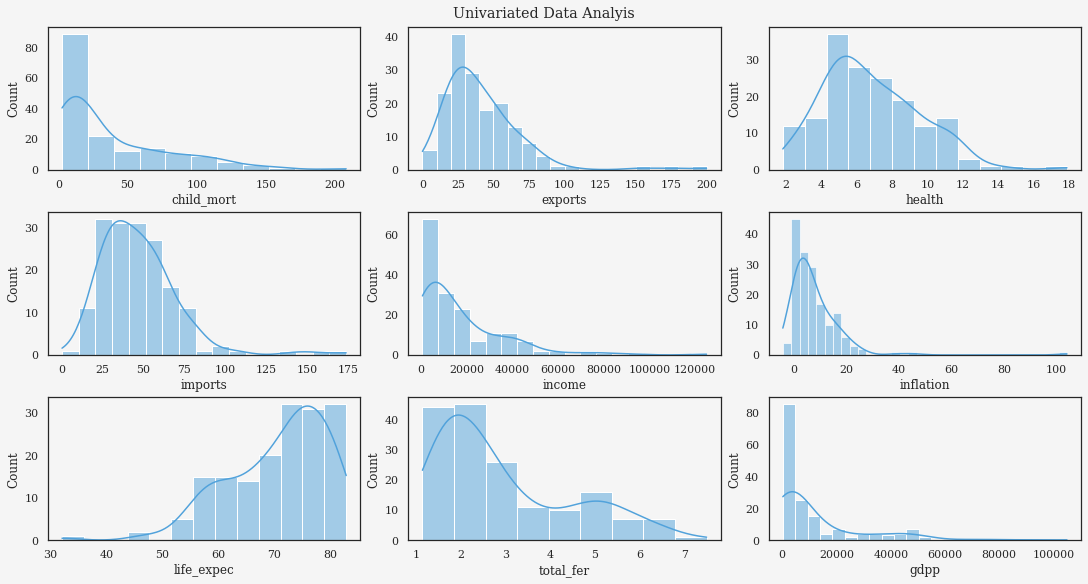

In [ ]:

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(df[i], ax=ax[x], kde=True, color=colors[2])

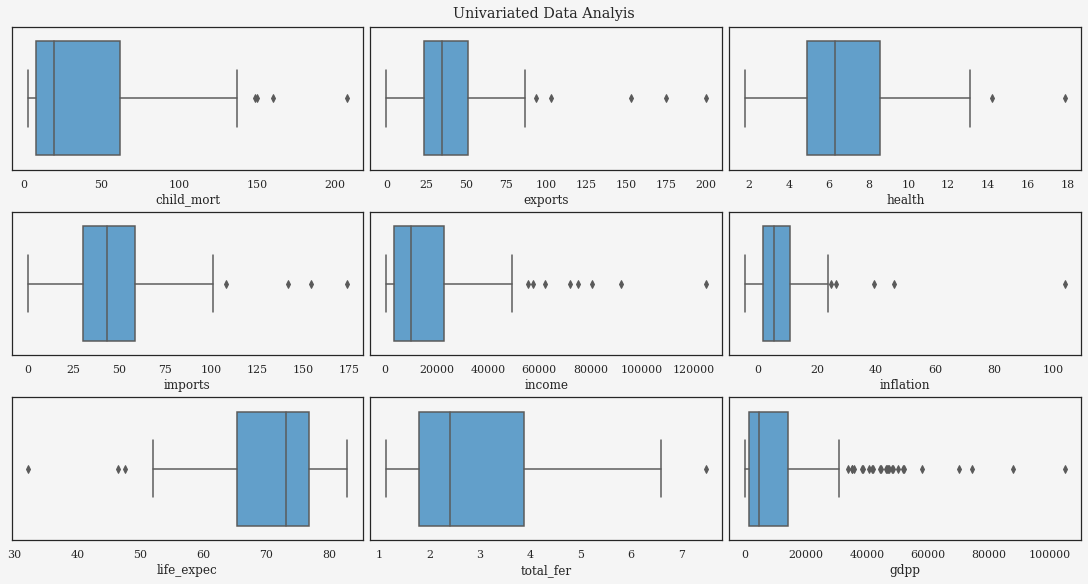

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(x=df[i], ax=ax[x], color=colors[2])

Observations

1. Both Histogram and the boxplot clearly shows that the numerical features are contineous or discreate values. there are no features with categorical values.

2. Box plot shows us there are clear outliers in child_mort, exports, imports, income, gdpp features. however, these informations are belongs to each country. so, we can't expect the values to be normaly distributed wihtout outliers.

3. Also, the problem statement clearly describes the we need to cluster the countries that need help. so, there are clustering algorithms like Manhaten distance are less sensible to outliers (Which is not taught in the course, and I also don't know it yet, either).


In [ ]:
print(int_cols)

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


Bivariated Data Analysis

In [12]:
px.scatter(data_frame=df, x='exports', y='imports',size='gdpp', text='country', color='gdpp', title='Countries by Export & Import and corresponding GDP')

In [ ]:
for i in int_cols:
    fig=px.choropleth(data_frame=df, locationmode='country names', locations='country', color=i, title=f'{i} rate by countries')
    fig.show()

From the above Graphs we can see that there are 2 clusters: Aftican and south Asian countires and rest of the world countries. 

Although, it maybe more than that and further exploration would help us to learn better

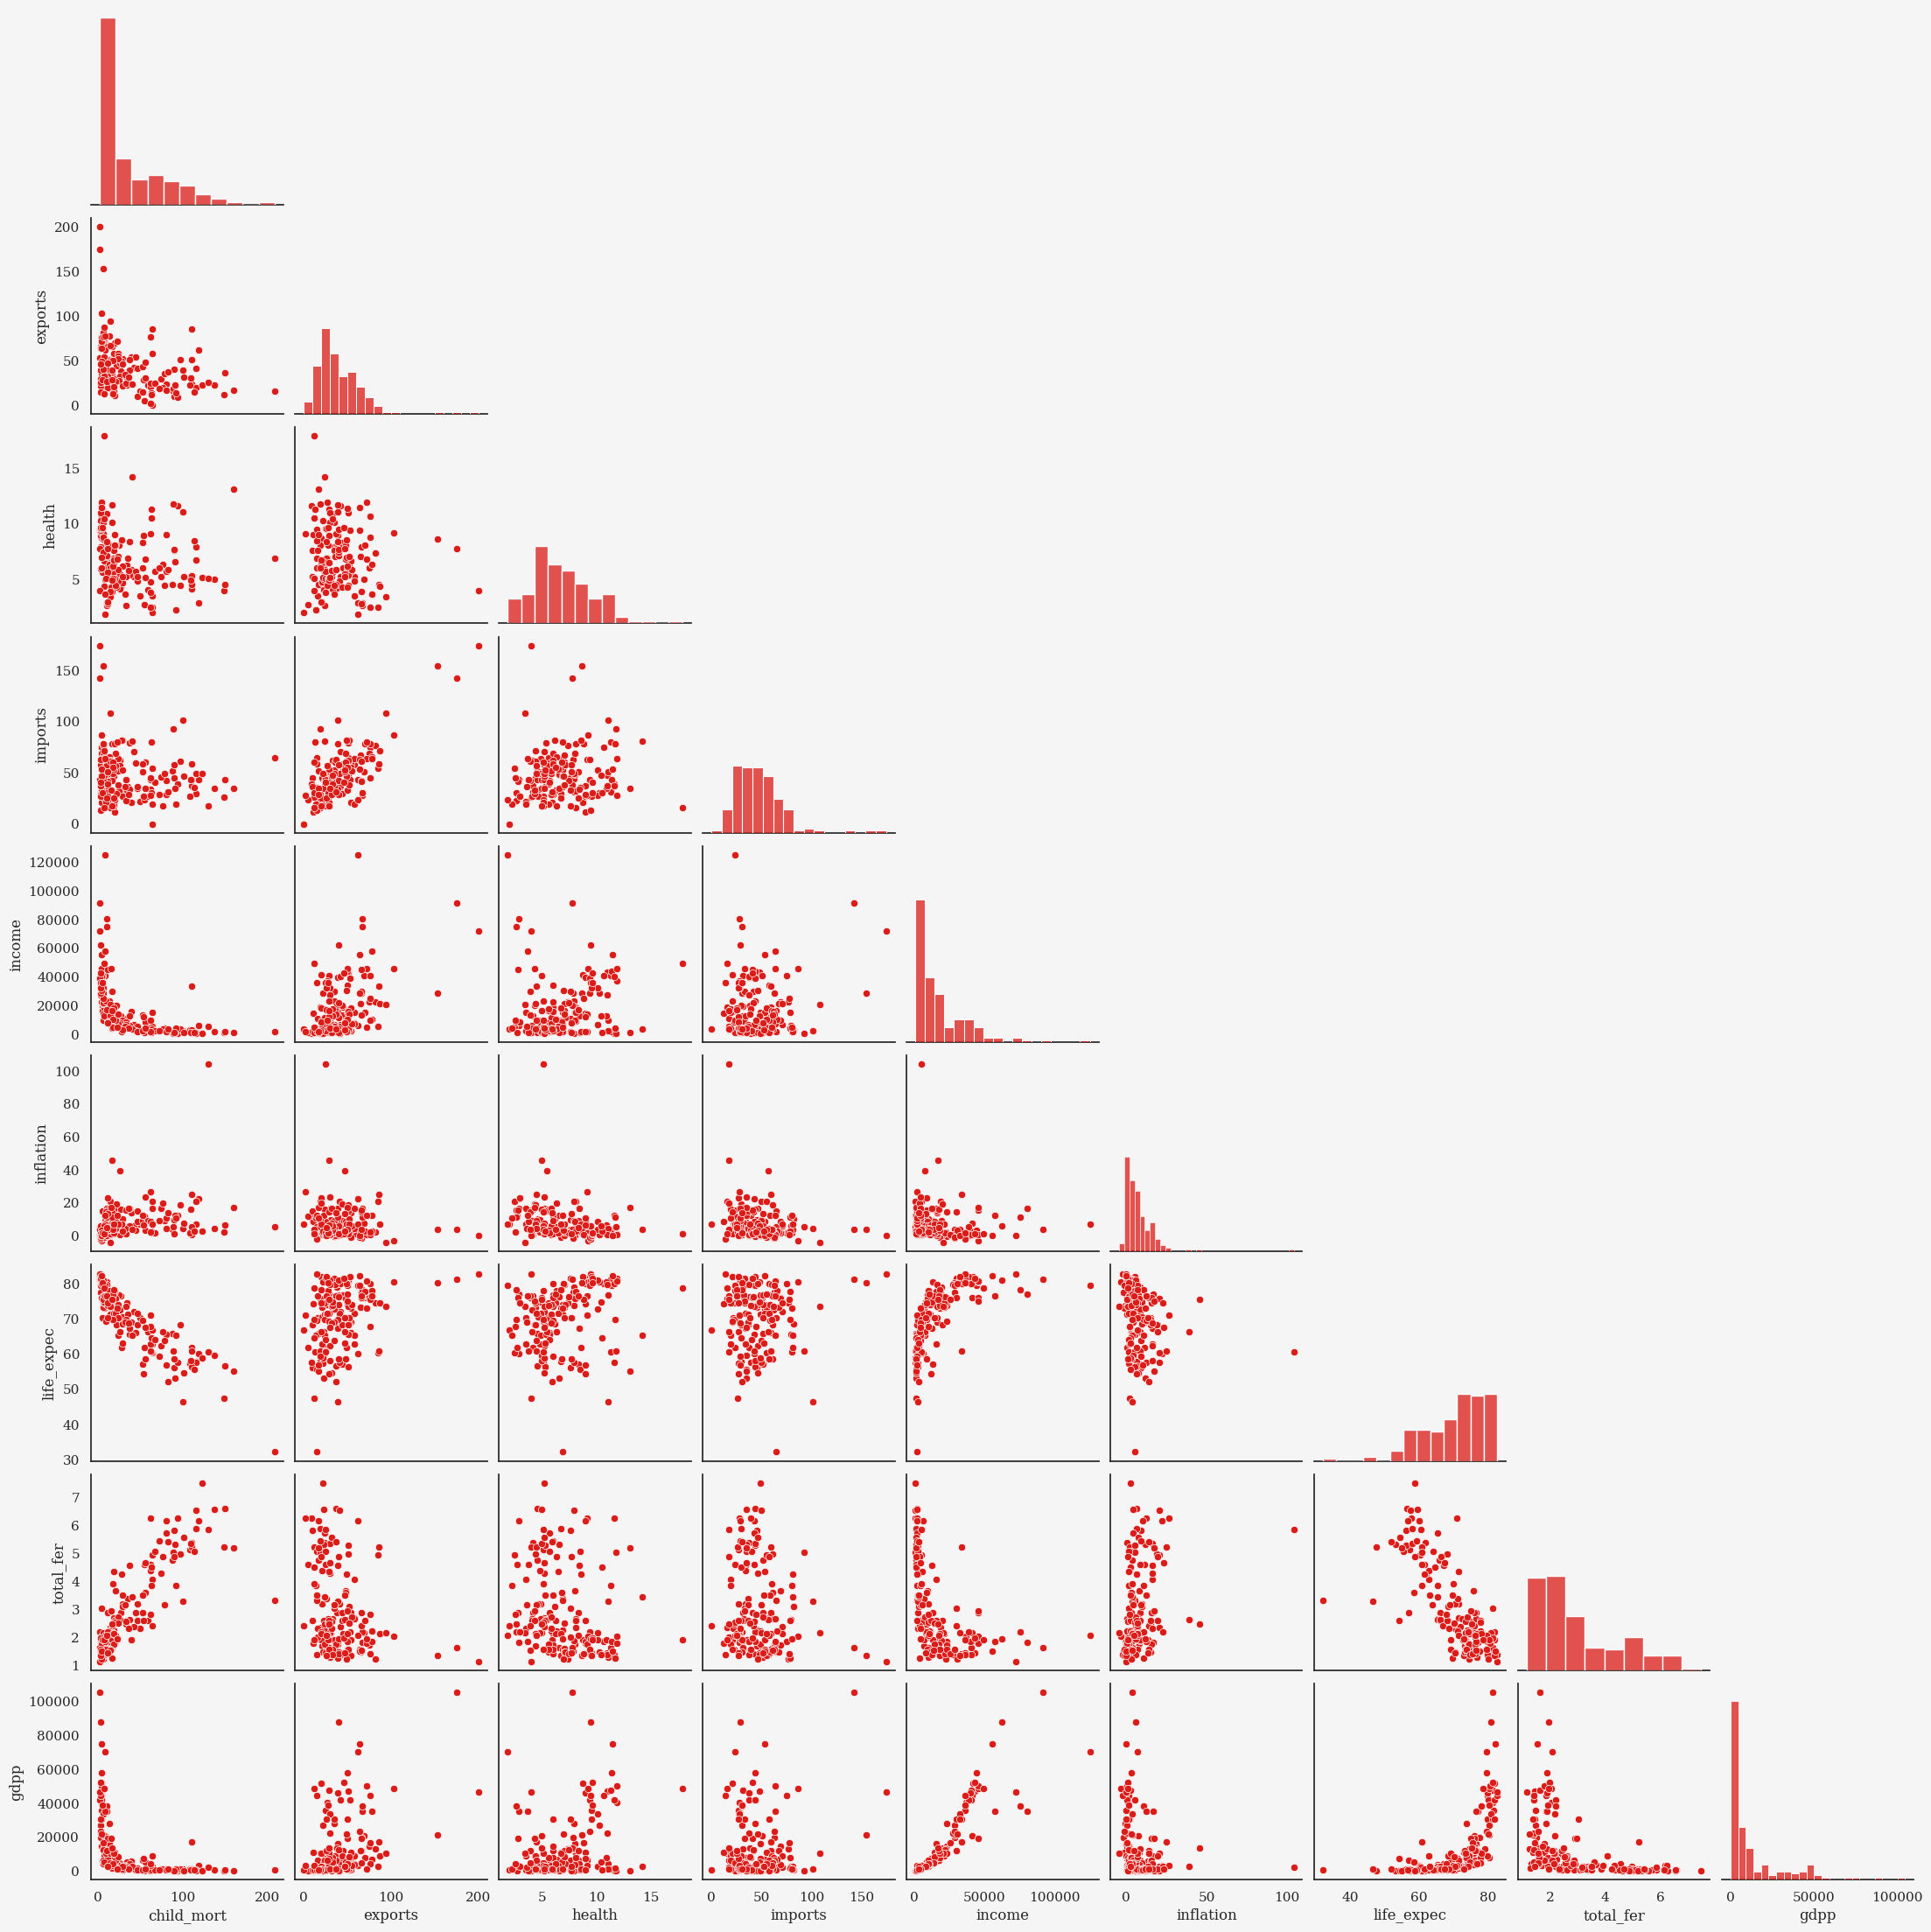

In [13]:
sns.pairplot(df, corner =True)

Observations:

1. Child_mort has negative relationship with GDP (the chart looks like a part of 1/x plot) as the child mortality is less the GDP also increases and vice versa. 

  Say if I want to remove some features, then these features should not be removed. They're in a negative relationship but not linear. Only linear features are considered.

2. Export, Incomehas postivite relationship with GDP.
3. Total_fer and child_mort has postive relationship.
4. total_fer and life_expec has negative relationship.
5. life_expec and childe_mort has negative relationship

<Axes: >

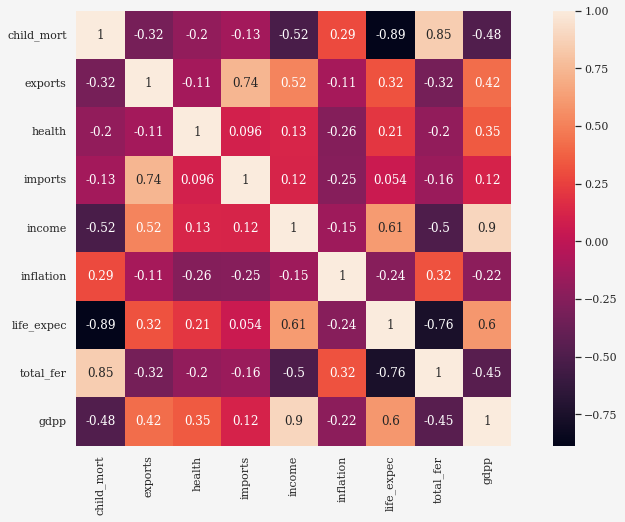

In [ ]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, square=True)

PCA

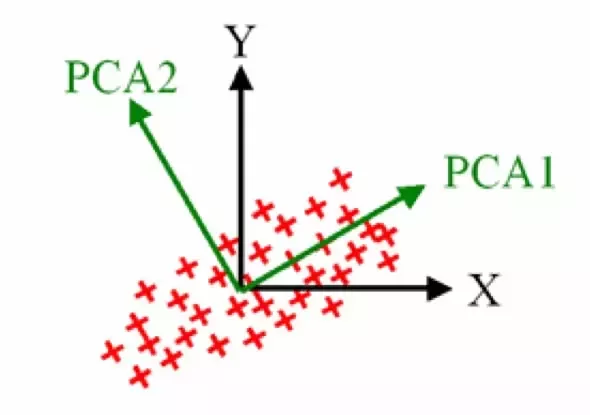

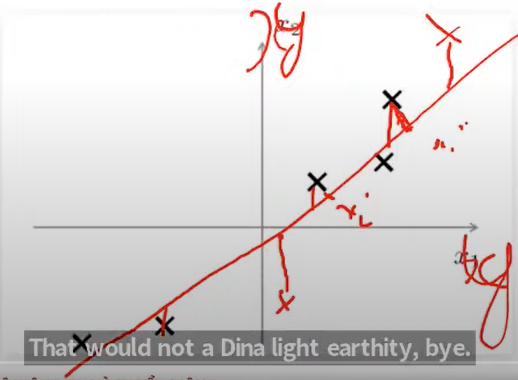

In [14]:
from sklearn.preprocessing import StandardScaler
# Normalize data to mean = 0 and std = 1. 
# Standard scaler is different from minmaxscaler, which scales
# data to a fixed range between 0 and 1
df_scaled = StandardScaler().fit_transform(df.drop(['country'], axis=1))

In [15]:
from sklearn.decomposition import PCA
decom = PCA()
decom.fit(df_scaled) 

PCA()

[0.46 0.63 0.76 0.87 0.94 0.96 0.97 0.98 0.99]


Text(0, 0.5, 'explaned variance ratio')

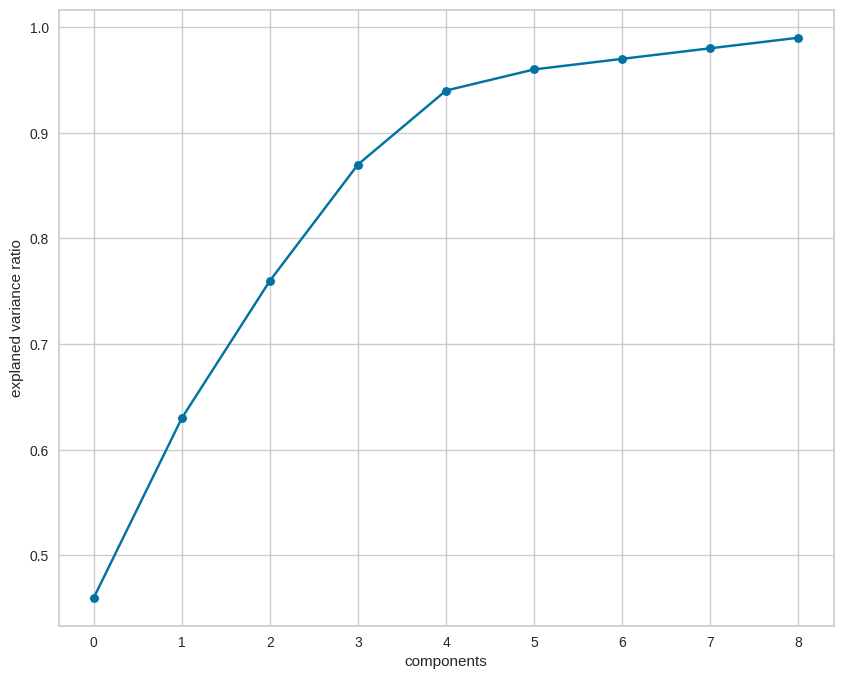

In [20]:
cum_exp_ratio = np.cumsum(np.round(decom.explained_variance_ratio_,2))
print(cum_exp_ratio)
fig=plt.figure(figsize=(10,8))
ax=sns.lineplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax=sns.scatterplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax.set_xlabel('components')
ax.set_ylabel('explaned variance ratio')

From the chart, I suggest that we can reduce data features from 9 to 8 or 7 where we can save most of the data information.

KNN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

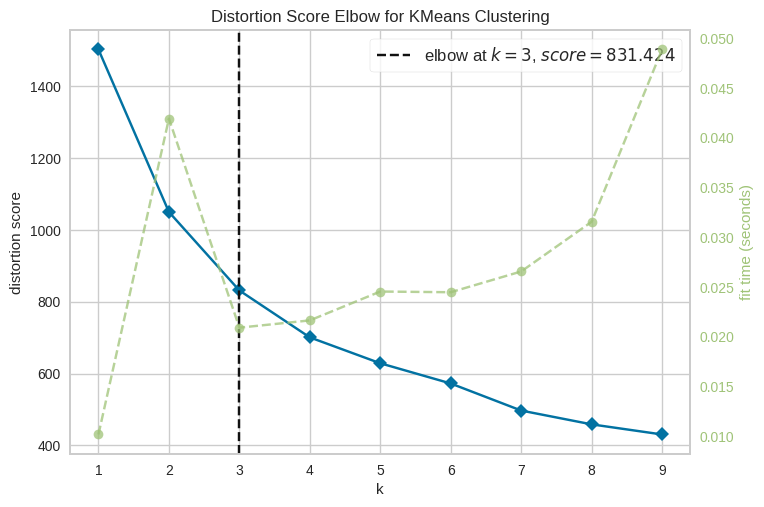

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# elbow cho kiểm tra số cluster hợp lí nhất
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(df_scaled)
visualize.poof()

The chart suggest that I should divide data into 3 clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<Axes: xlabel='child_mort', ylabel='health'>

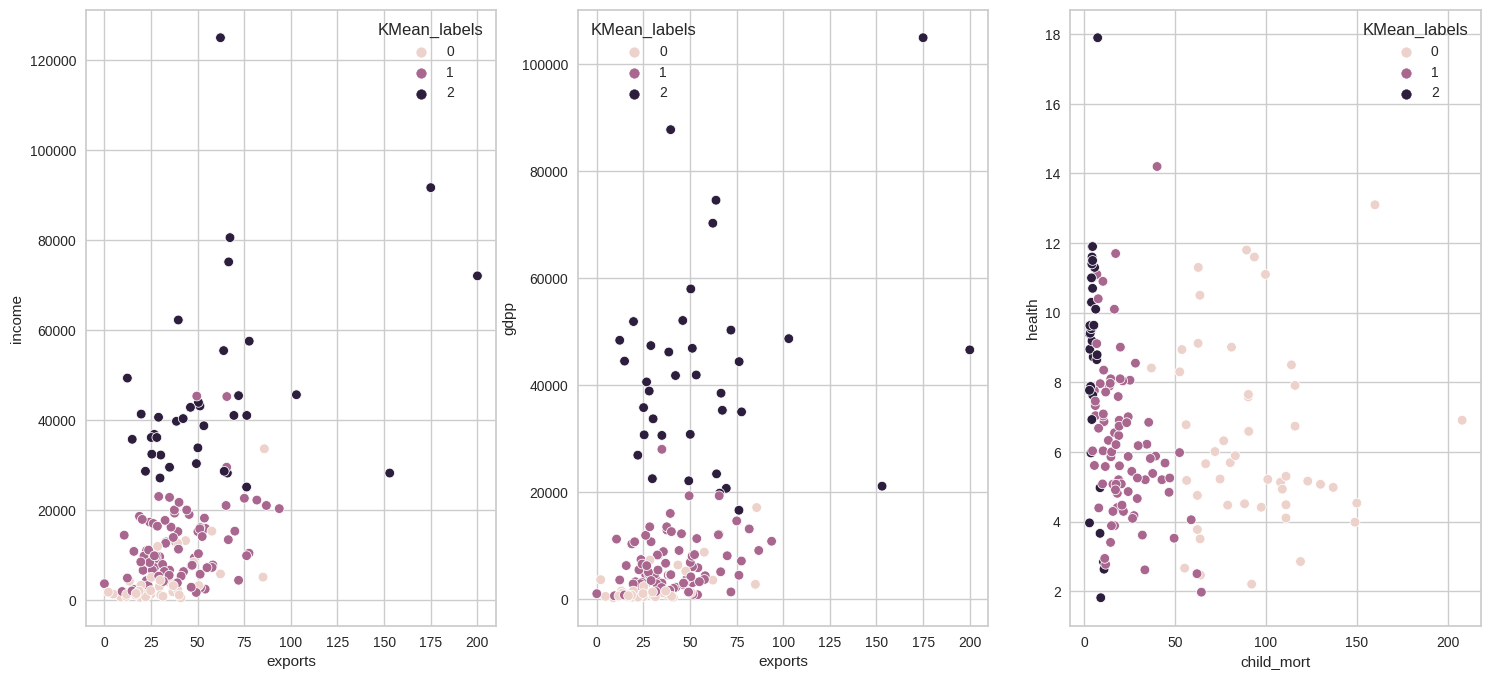

In [22]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(df_scaled)
df['KMean_labels']=model.labels_
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
sns.scatterplot(data=df, x='exports', y='income', hue='KMean_labels', ax=ax[0])
sns.scatterplot(data=df, x='exports', y='gdpp', hue='KMean_labels', ax=ax[1])
sns.scatterplot(data=df, x='child_mort', y='health', hue='KMean_labels', ax=ax[2])

In [25]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [24]:
df.groupby(['KMean_labels','country']).mean()

child_mort  exports  health  imports  \
KMean_labels country                                                      
0            Afghanistan                 90.2     10.0    7.58     44.9   
             Angola                     119.0     62.3    2.85     42.9   
             Benin                      111.0     23.8    4.10     37.2   
             Botswana                    52.5     43.6    8.30     51.3   
             Burkina Faso               116.0     19.2    6.74     29.6   
...                                       ...      ...     ...      ...   
2            Sweden                       3.0     46.2    9.63     40.7   
             Switzerland                  4.5     64.0   11.50     53.3   
             United Arab Emirates         8.6     77.7    3.66     63.6   
             United Kingdom               5.2     28.2    9.64     30.8   
             United States                7.3     12.4   17.90     15.8   

                                    income  inflation  life_expec  total_fer  \
KMean_labels country                                                           
0            Afghanistan            1610.0      9.440        56.2       5.82   
             Angola                 5900.0     22.400        60.1       6.16   
             Benin                  1820.0      0.885        61.8       5.36   
             Botswana              13300.0      8.920        57.1       2.88   
             Burkina Faso           1430.0      6.810        57.9       5.87   
...                                    ...        ...         ...        ...   
2            Sweden                42900.0      0.991        81.5       1.98   
             Switzerland           55500.0      0.317        82.2       1.52   
             United Arab Emirates  57600.0     12.500        76.5       1.87   
             United Kingdom        36200.0      1.570        80.3       1.92   
             United States         49400.0      1.220        78.7       1.93   

                                      gdpp  
KMean_labels country                        
0            Afghanistan             553.0  
             Angola                 3530.0  
             Benin                   758.0  
             Botswana               6350.0  
             Burkina Faso            575.0  
...                                    ...  
2            Sweden                52100.0  
             Switzerland           74600.0  
             United Arab Emirates  35000.0  
             United Kingdom        38900.0  
             United States         48400.0  

[167 rows x 9 columns]

In [ ]:
# These code lines are used in the ref link but I don't understand the sillhouette_score so I temporarily don't use it
# from sklearn.metrics import silhouette_score
# silhouette_score(df_scaled,labels=model.labels_)

0.28329575683463126

In [ ]:
#df['KMean_labels']=df['KMean_labels'].astype('category')
cat = {0:'Need Help',1:'Might need help',2:'No Help needed'}
df['KMean_labels']=df['KMean_labels'].map(cat)

px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['KMean_labels'], title='Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular')

DBSCAN